In [6]:
import os
import json
import sys

files = os.listdir("data/fsoco_bounding_boxes_train/amz/ann")
labels = ["yellow_cone", "orange_cone", "large_orange_cone", "blue_cone", "other_cone"]
labels_path = "data/fsoco_bounding_boxes_train/amz/labels/"
for file in files:
    with open("data/fsoco_bounding_boxes_train/amz/ann/{}".format(file)) as f:
        formattedFileName = file.split(".")[0]
        decoded_json = json.load(f)
        im_height, im_width = decoded_json["size"].values()
        for obj in decoded_json['objects']:
            x1y1, x2y2 = obj['points']['exterior']
            # x1y1[0]=x1y1[0]/im_width
            # x1y1[1]=x1y1[1]/im_height
            # x2y2[0]=x2y2[0]/im_width
            # x2y2[1]=x2y2[1]/im_height

            x_centre=(((x1y1[0] + x2y2[0]))/2)/im_width
            # y centre = (y1 + y2) / 2 
            y_centre=(((x1y1[1] + x2y2[1]))/2)/im_height
            # bounding box width = x2 - x1
            box_width=abs(x2y2[0]-x1y1[0])/im_width
            # bounding box height = y2 - y1
            box_height=abs(x2y2[1]-x1y1[1])/im_height
            
            os.system("touch {top_level}{filename}.txt".format(top_level = labels_path, filename = formattedFileName))
            with open("{top_level}{filename}.txt".format(top_level = labels_path, filename = formattedFileName), 'a+') as txt:
                # check for duplicates
                txt.write("{class_idx} {x_center} {y_center} {width} {height}\n".format(class_idx=labels.index(obj['classTitle']),x_center=x_centre, y_center=y_centre, width=box_width, height=box_height))
        print(decoded_json['objects'][0]['points']['exterior'][0])


[0.04979108635097493, 0.5184707903780069]
[0.38563829787234044, 0.5736486486486486]
[0.4258356545961003, 0.5515463917525774]
[0.8914893617021277, 0.4212962962962963]
[0.17479108635097493, 0.5231958762886598]
[0.2797872340425532, 0.4388888888888889]
[0.7148936170212766, 0.4046296296296296]
[0.17553191489361702, 0.5296296296296297]
[0.6183844011142061, 0.4114864864864865]
[0.11542553191489362, 0.6231481481481481]
[0.7482590529247911, 0.5476804123711341]
[0.5680851063829787, 0.41574074074074074]
[0.05954038997214485, 0.5871621621621622]
[0.0973404255319149, 0.38981481481481484]
[0.4787234042553192, 0.44907407407407407]
[0.15585106382978722, 0.39444444444444443]
[0.8281914893617022, 0.3685185185185185]
[0.16086350974930363, 0.4690721649484536]
[0.9063370473537604, 0.4566151202749141]
[0.8026595744680851, 0.38796296296296295]
[0.38670212765957446, 0.5831081081081081]
[0.8797872340425532, 0.35462962962962963]
[0.04874651810584958, 0.7216494845360825]
[0.573404255319149, 0.37777777777777777]


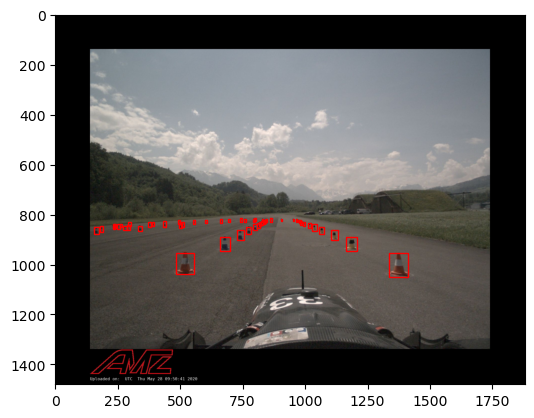

In [7]:
#Image testing
# 
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
from PIL import Image
import json

with open("data/fsoco_bounding_boxes_train/amz/ann/amz_00000.jpg.json") as f:
        decoded_json = json.load(f)
        im_height, im_width = decoded_json["size"].values()
        objects = decoded_json['objects']
        boxes_coords = [] #list of tuples (x1, y1, x2, y2)  (x1,y1) is the bottom left and (x2,y2) is the top right
        for obj in objects:
            boxes_coords.append(tuple([element for sublist in obj['points']['exterior'] for element in sublist])) #For every sublist in obj['points']['exterior'] get the elements in that sublist. Ngl some voodoo magic right here




plt.imshow(Image.open("data/fsoco_bounding_boxes_train/amz/images/amz_00000.jpg"))
ax = plt.gca()

for box in boxes_coords:
    #                   x1     y1       x2     x1      y2     y1          <- (x1,y1) gives the bottom left corner of rect
    rect = Rectangle((box[0],box[1]), box[2]-box[0], box[3]-box[1], linewidth=1, edgecolor='r',facecolor='none')
    ax.add_patch(rect)